In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
folder_test = "../miccai/test_csvs/"
folder_quant = "../miccai/quantifications/"
file_infos = [
    ("gannet_full.csv","00_gannet_full"),
    ("gannet_acc.csv","00_gannet_quarter"),
    ("sim_unet_1d_onoff.csv","01_unet_1d_sim_onoff"),
    ("sim_unet_1d.csv","02_unet_1d_sim"),
    ("sim_pre_down_unet_2d_onoff.csv","03_unet_2d_sim_onoff"),
    ("sim_pre_down_unet_2d.csv","04_unet_2d_sim"),
    ("invivo_unet_1d_onoff.csv","05_unet_1d_invivo_onoff"),
    ("invivo_unet_1d.csv","06_unet_1d_invivo"),
    ("invivo_pre_down_unet_2d_onoff.csv","07_unet_2d_invivo_onoff"),
    ("invivo_pre_down_unet_2d.csv","08_unet_2d_invivo"),
    ("ft_unet_1d_onoff.csv","09_unet_1d_ft_onoff"),
    ("ft_unet_1d.csv","10_unet_1d_ft"),
    ("ft_pre_down_unet_2d_onoff_v3.csv","11_unet_2d_ft_onoff"),
    ("ft_pre_down_unet_2d.csv","12_unet_2d_ft")
]

In [3]:
pre_dfs =[]
for file_info in file_infos:
    pre_df_test = pd.read_csv(f"{folder_test}/{file_info[0]}")
    pre_df_quant = pd.read_csv(f"{folder_quant}/{file_info[0]}")
    pre_df = pd.merge(pre_df_test,pre_df_quant,on="filename",suffixes=("","_gannet"))
    assert pre_df_quant.shape[0]==pre_df_test.shape[0]
    assert pre_df.shape[0]==pre_df_quant.shape[0]
    pre_df["model"]=file_info[1]
    pre_dfs.append(pre_df)
df = pd.concat(pre_dfs,sort=False)
#print(df)

In [4]:
tb_df = df[["model","mse","gaba_snr","gaba_linewidth","gaba_fit_error"]]

In [5]:
tb_df.groupby("model").mean()

,mse,gaba_snr,gaba_linewidth,gaba_fit_error
model,,,,
00_gannet_full,0.000000,19.637423,0.168589,4.998820
00_gannet_quarter,0.033205,10.049353,0.181966,7.839594
01_unet_1d_sim_onoff,0.165073,45.803618,1.990370,7.244432
02_unet_1d_sim,0.111094,15.774385,0.159459,6.342016
03_unet_2d_sim_onoff,0.238774,117.289020,0.165617,12.268173
04_unet_2d_sim,0.155599,24.545944,0.188124,4.408677
05_unet_1d_invivo_onoff,0.062114,112.642991,0.181966,5.330350
06_unet_1d_invivo,0.035156,23.279349,0.169863,5.842673
07_unet_2d_invivo_onoff,0.041223,32.080439,0.169014,6.295513


In [6]:
tb_df.groupby("model").std()

,mse,gaba_snr,gaba_linewidth,gaba_fit_error
model,,,,
00_gannet_full,0.000000,5.489923,0.013421,2.436705
00_gannet_quarter,0.080862,3.077060,0.030674,5.098864
01_unet_1d_sim_onoff,0.107207,27.473143,3.784850,7.978624
02_unet_1d_sim,0.074982,6.025335,0.026044,4.227167
03_unet_2d_sim_onoff,0.148117,78.065330,0.094505,18.269953
04_unet_2d_sim,0.088884,11.901240,0.032904,2.342789
05_unet_1d_invivo_onoff,0.050529,60.021419,0.046147,8.093267
06_unet_1d_invivo,0.023101,8.999171,0.018822,2.927001
07_unet_2d_invivo_onoff,0.030153,15.797344,0.030997,3.298615


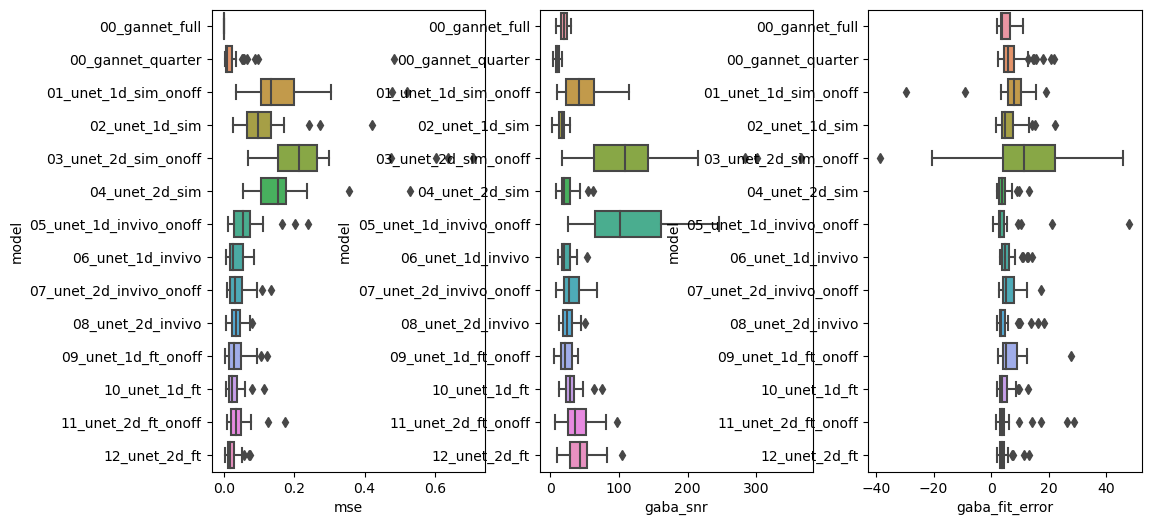

In [5]:
filter_models = ["00_gannet_full","00_gannet_quarter","05_unet_1d_invivo_onoff","06_unet_1d_invivo",
                 "07_unet_2d_invivo_onoff","08_unet_2d_invivo","09_unet_1d_ft_onoff","10_unet_1d_ft",
                 "11_unet_2d_ft_onoff","12_unet_2d_ft"]

fig,ax = plt.subplots(1,3,figsize=(12,6))

sns.boxplot(data=tb_df,x="mse",y="model",ax=ax[0])
sns.boxplot(data=tb_df,x="gaba_snr",y="model",ax=ax[1])
sns.boxplot(data=tb_df,x="gaba_fit_error",y="model",ax=ax[2])




plt.show()



In [21]:
df

,filename,mse,gaba_snr,gaba_linewidth,shape_score,gaba_snr_gannet,gaba_linewidth_gannet,gaba_fit_error,gaba_conc_water,gaba_conc_cr,glx_snr,glx_linewidth,glx_fit_error,glx_conc_water,glx_conc_cr,model
0,g4_s10,0.000000,19.340723,0.168164,1.000000,28.228547,18.210503,2.144352,1.988227,0.124137,38.298730,14.794497,1.580521,7.793349,0.133414,00_gannet_full
1,g4_s11,0.000000,26.820897,0.145233,1.000000,23.250782,17.307668,7.095469,1.882590,0.116149,34.208767,14.147776,4.822600,7.910660,0.133819,00_gannet_full
2,g4_s12,0.000000,24.293906,0.160521,1.000000,23.479755,19.645260,3.837152,2.424905,0.153601,27.458091,17.151280,3.281197,8.217135,0.142713,00_gannet_full
3,g5_s10,0.000000,20.310880,0.152876,1.000000,33.253959,18.243677,2.627479,1.699003,0.113578,55.725098,14.930599,1.567948,8.214556,0.150566,00_gannet_full
4,g5_s11,0.000000,23.476247,0.168165,1.000000,33.931233,19.194540,3.500363,1.667215,0.109576,50.853766,17.360257,2.335552,7.578663,0.136572,00_gannet_full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,s5_s11,0.025503,39.027294,0.175809,0.966112,34.982460,20.110424,2.620547,2.916984,0.131905,42.409754,13.956572,2.161606,8.664597,0.107428,12_unet_2d_ft
32,s5_s12,0.024770,20.293148,0.175808,0.955769,39.134656,19.775523,3.373772,2.765700,0.129509,51.679780,14.167612,2.554798,9.039033,0.116054,12_unet_2d_ft
33,s8_s10,0.028233,59.990906,0.160521,0.991051,48.121899,19.743703,2.966918,2.590768,0.111091,65.454897,13.604679,2.181253,8.736231,0.102711,12_unet_2d_ft
34,s8_s11,0.046269,25.345325,0.191095,0.907228,76.457899,23.607420,4.319952,2.693542,0.114225,116.909265,13.417471,2.825221,8.111177,0.094312,12_unet_2d_ft


In [6]:
### compute wilcoxon
w_models = ["00_gannet_full","00_gannet_quarter","12_unet_2d_ft"]
w_metrics = ["mse","gaba_snr","gaba_linewidth","gaba_fit_error"]
w_df = df[df["model"].isin(["00_gannet_full","00_gannet_quarter","12_unet_2d_ft"])][["model","mse","gaba_snr","gaba_linewidth","gaba_fit_error"]]

In [7]:
for metric in w_metrics:
    print(f"------ {metric.upper()} -----")
    for i in range(len(w_models)):
        for j in range(i+1,len(w_models)):
            i_vec = w_df[w_df['model']==w_models[i]][metric].values
            j_vec = w_df[w_df['model']==w_models[j]][metric].values
            print(f"{w_models[i]}: {i_vec.mean():.3f} - {w_models[j]}: {j_vec.mean():.3f} => p_value = {st.wilcoxon(i_vec,j_vec).pvalue}")

------ MSE -----
00_gannet_full: 0.000 - 00_gannet_quarter: 0.033 => p_value = 2.9103830456733704e-11
00_gannet_full: 0.000 - 12_unet_2d_ft: 0.023 => p_value = 2.9103830456733704e-11
00_gannet_quarter: 0.033 - 12_unet_2d_ft: 0.023 => p_value = 0.10447610821574926
------ GABA_SNR -----
00_gannet_full: 19.637 - 00_gannet_quarter: 10.049 => p_value = 2.9103830456733704e-11
00_gannet_full: 19.637 - 12_unet_2d_ft: 45.318 => p_value = 2.561137080192566e-09
00_gannet_quarter: 10.049 - 12_unet_2d_ft: 45.318 => p_value = 2.9103830456733704e-11
------ GABA_LINEWIDTH -----
00_gannet_full: 0.169 - 00_gannet_quarter: 0.182 => p_value = 0.0234813700021214
00_gannet_full: 0.169 - 12_unet_2d_ft: 0.167 => p_value = 0.7604710732837942
00_gannet_quarter: 0.182 - 12_unet_2d_ft: 0.167 => p_value = 0.010728534370577693
------ GABA_FIT_ERROR -----
00_gannet_full: 4.999 - 00_gannet_quarter: 7.840 => p_value = 1.2514647096395493e-09
00_gannet_full: 4.999 - 12_unet_2d_ft: 4.394 => p_value = 0.04422121457173489


c:\Users\rodrigo\anaconda3\envs\thesis\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [25]:
w_df["model"].unique()

array(['00_gannet_full', '00_gannet_quarter', '12_unet_2d_ft'],
      dtype=object)

In [21]:
df.groupby("model").mean()

C:\Users\rodrigo\AppData\Local\Temp\ipykernel_23064\2842441985.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("model").mean()


,mse,gaba_snr,gaba_linewidth,shape_score,gaba_snr_gannet,gaba_linewidth_gannet,gaba_fit_error,gaba_conc_water,gaba_conc_cr,glx_snr,glx_linewidth,glx_fit_error,glx_conc_water,glx_conc_cr
model,,,,,,,,,,,,,,
unet_2d_ft,0.031595,28.310542,0.169438,0.959693,37.412607,19.642292,4.688360,1.959521,0.123648,51.619568,14.880193,3.228993,6.932729,0.126508
unet_2d_invivo,0.034770,25.788733,0.165829,0.930127,29.393608,19.513238,5.060296,1.772324,0.111001,39.437230,17.383870,3.575678,6.745394,0.115531
unet_2d_sim,0.070091,27.229488,0.158397,0.871924,36.759667,17.479979,4.094574,1.261179,0.091493,41.434678,27.543318,3.807699,5.340119,0.101165


In [6]:
dfs=[]
for file_info in file_infos:
    with open(f"{folder}/{file_info[0]}") as f:
        file_json = json.load(f)
        row_df = pd.DataFrame({
            "model":file_info[1],
            "scan_n":np.arange(1,37),
            "mse":file_json["metrics"]["mse"],
            "gaba_snr":file_json["metrics"]["gaba_snr"],
            "shape_score":file_json["metrics"]["shape_score"]
        })
        dfs.append(row_df)

df = pd.concat(dfs,sort=False)


FileNotFoundError: [Errno 2] No such file or directory: '../miccai/test_csvs//sim_pre_down_unet_2d.json'

In [8]:
df.groupby("model").agg({"mse":"mean","gaba_snr":"mean","shape_score":"mean"})

,mse,gaba_snr,shape_score
model,,,
unet_2d_ft,0.019527,NaN,0.981676
unet_2d_ft_onoff,0.056630,NaN,0.889453
unet_2d_invivo,0.020998,42.032258,0.981868
unet_2d_invivo_onoff,0.037407,NaN,0.938531
unet_2d_sim,0.305044,6.848261,0.103774
unet_2d_sim_onoff,4.704780,126.797930,0.575780


In [7]:
### quantification analysis
q_folder = "../final_quantification"
q_file_infos = [
    ("20230627_ft_sim_final_pre_down_unet_2d_split_1.pth.csv","unet_2d_ft"),
    ("20230628_final_pre_down_unet_2d_split_1.pth.csv","unet_2d_invivo"),
    ("20230629_final_pre_down_unet_2d_split_1_onoff.pth.csv","unet_2d_invivo_onoff"),
    ("20230629_ft_sim_final_pre_down_unet_2d_split_1_onoff.pth.csv","unet_2d_ft_onoff"),
]

dfs=[]
for q_file_info in q_file_infos:
    i_df = pd.read_csv(f"{q_folder}/{q_file_info[0]}")
    i_df["model"]=q_file_info[1]
    dfs.append(i_df)

df = pd.concat(dfs,sort=False)

In [9]:
print(df.groupby("model").agg({"gaba_fit_error":"mean"}))
print(df.groupby("model").agg({"gaba_fit_error":"std"}))
print(df.groupby("model").agg({"gaba_fit_error":"median"}))

                      gaba_fit_error
model                               
unet_2d_ft                  4.353714
unet_2d_ft_onoff            1.556982
unet_2d_invivo              4.807314
unet_2d_invivo_onoff        4.562827
                      gaba_fit_error
model                               
unet_2d_ft                  2.983080
unet_2d_ft_onoff           10.609316
unet_2d_invivo              4.124764
unet_2d_invivo_onoff        2.355621
                      gaba_fit_error
model                               
unet_2d_ft                  3.395728
unet_2d_ft_onoff            3.029113
unet_2d_invivo              3.343816
unet_2d_invivo_onoff        3.770344


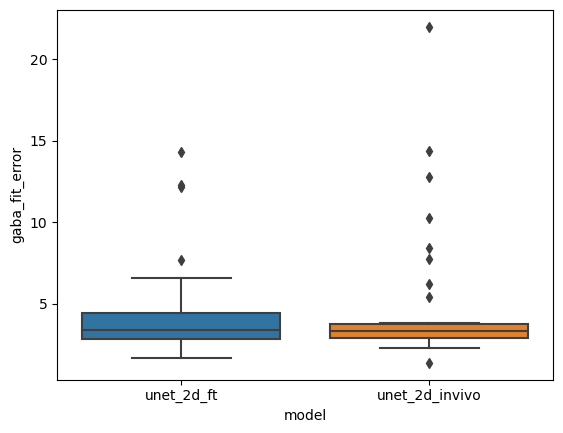

In [17]:
sns.boxplot(data=df,x="model",y="gaba_fit_error")
plt.show()

In [15]:
gaba_fit_errors=[]
for q_file_info in q_file_infos:
    i_df = pd.read_csv(f"{q_folder}/{q_file_info[0]}")
    gaba_fit_errors.append(i_df["gaba_fit_error"].values)

st.wilcoxon(gaba_fit_errors[0],gaba_fit_errors[1])

WilcoxonResult(statistic=296.0, pvalue=0.5706635903334245)